In [3]:

from __future__ import print_function, division
from builtins import range, input

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from keras.utils import load_img, img_to_array

In [4]:
IMAGE_SIZE = [100, 100]
epochs = 6
batch_size = 32
train_path = "train"
valid_path = "test"


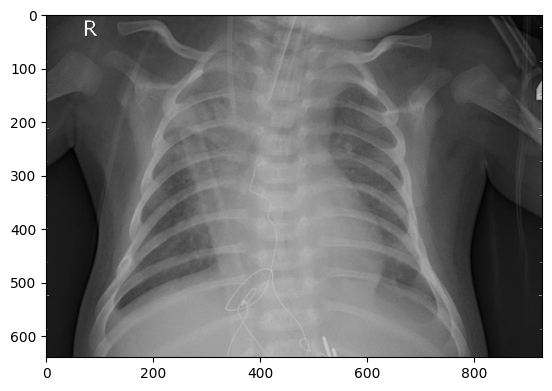



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -123.68 max: 151.061


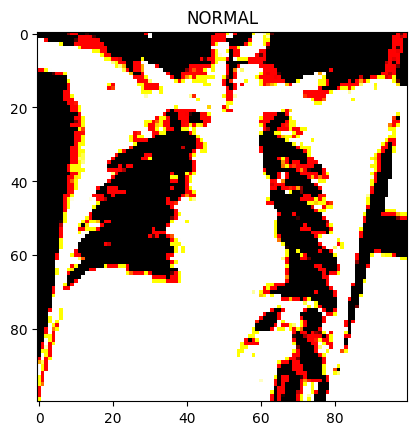

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/6


163/163 [==============================] - 247s 2s/step - loss: 1.8377 - accuracy: 0.8662 - val_loss: 2.0533 - val_accuracy: 0.8470
Epoch 2/6
163/163 [==============================] - 225s 1s/step - loss: 1.2673 - accuracy: 0.9076 - val_loss: 3.5237 - val_accuracy: 0.8372
Epoch 3/6
163/163 [==============================] - 226s 1s/step - loss: 1.0494 - accuracy: 0.9227 - val_loss: 5.1950 - val_accuracy: 0.7730
Epoch 4/6
163/163 [==============================] - 228s 1s/step - loss: 1.1277 - accuracy: 0.9199 - val_loss: 4.2814 - val_accuracy: 0.7911
Epoch 5/6
163/163 [==============================] - 223s 1s/step - loss: 1.0630 - accuracy: 0.9300 - val_loss: 3.7651 - val_accuracy: 0.8076
Epoch 6/6
163/163 [==============================] - 223s 1s/step - loss: 0.9389 - accuracy: 0.9358 - val_loss: 2.1279 - val_accuracy: 0.8783


In [6]:

image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')


folders = glob(train_path + '/*')


plt.imshow(img_to_array(load_img(np.random.choice(image_files))).astype('uint8'))
plt.show()


vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False


x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

model.summary()


model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)


gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)



test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
    labels[v] = k

for x, y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    plt.show()
    break



train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)



r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)



In [7]:
print(r)

1/1 [==============================] - 0s 351ms/step
Predicted class: NORMAL
Class probabilities: [[1. 0.]]


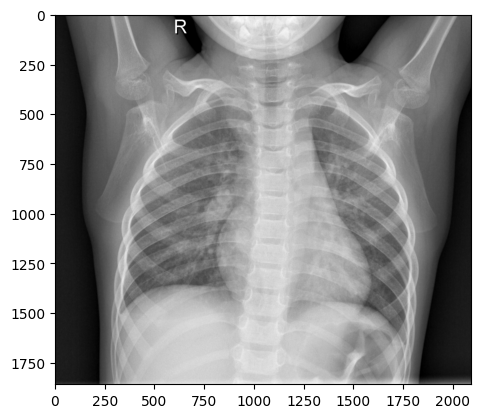

In [8]:

import keras.utils as image
import numpy as np


img_path = 'C:/Users/HP/Desktop/major project/train/NORMAL/IM-0115-0001.jpeg'  
img = image.load_img(img_path, target_size=(100, 100))  


img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)

predicted_class_index = np.argmax(predictions)
class_labels = train_generator.class_indices
predicted_class_label = [k for k, v in class_labels.items() if v == predicted_class_index][0]

print("Predicted class:", predicted_class_label)
print("Class probabilities:", predictions)
plt.imshow(image.load_img(img_path))
plt.show()


In [9]:
model.save("pneumonia.h5")

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
print(class_labels)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [11]:
train_accuracy =r.history['accuracy']
val_accuracy =r.history['val_accuracy']

print("Training Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Training Accuracy: 0.935774564743042
Validation Accuracy: 0.8782894611358643


In [16]:
valid_image_fi = glob("val" + '/*/*.jp*g')
con = gen.flow_from_directory("val", target_size=IMAGE_SIZE)
print(con.class_indices)
labels = [None] * len(con.class_indices)
for k, v in con.class_indices.items():
    labels[v] = k

Found 16 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}


In [17]:
from keras.models import load_model
model=load_model("pneumonia.h5")

C:\Users\HP\AppData\Local\Temp\ipykernel_12332\4149119016.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(con, len(valid_image_fi) // batch_size+1)


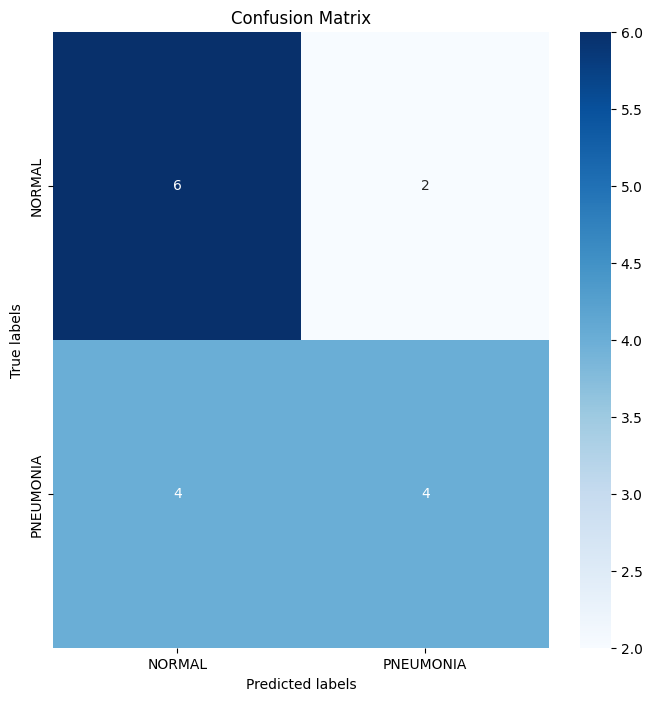

Precision: 0.67
Recall: 0.50
              precision    recall  f1-score   support

      NORMAL       0.60      0.75      0.67         8
   PNEUMONIA       0.67      0.50      0.57         8

    accuracy                           0.62        16
   macro avg       0.63      0.62      0.62        16
weighted avg       0.63      0.62      0.62        16



In [20]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns

# Prediction on test data
Y_pred = model.predict_generator(con, len(valid_image_fi) // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = con.classes

# Calculating confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=con.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Additional metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print(classification_report(y_true, y_pred, target_names=con.class_indices.keys()))


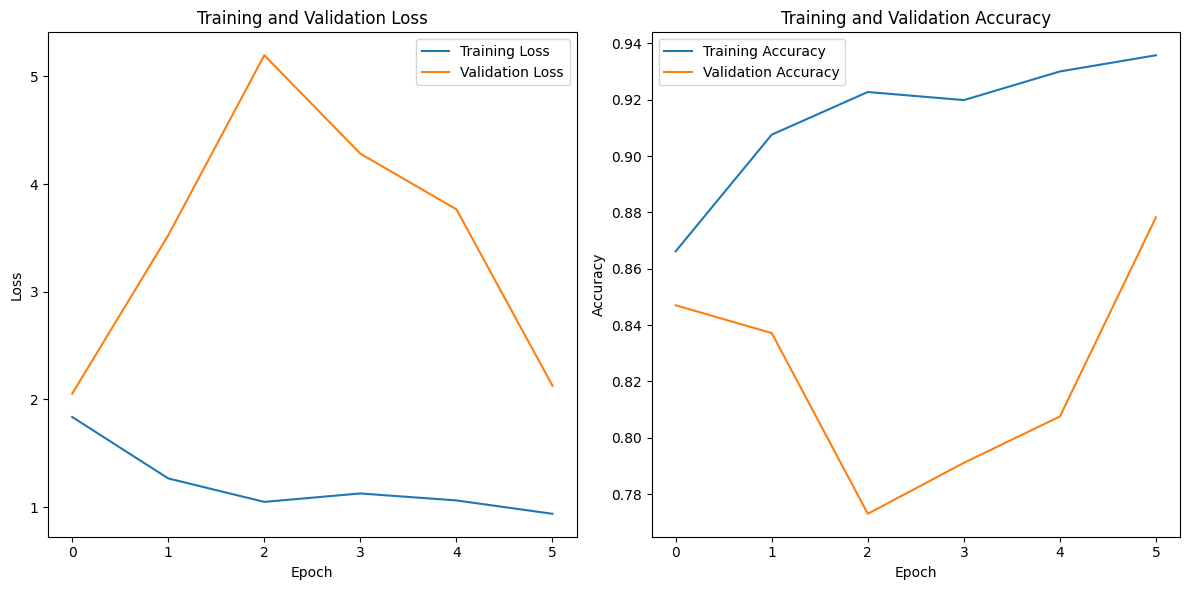

In [21]:
import matplotlib.pyplot as plt

# Accessing loss and accuracy values from the history object
train_loss = r.history['loss']
val_loss = r.history['val_loss']
train_accuracy = r.history['accuracy']
val_accuracy = r.history['val_accuracy']

# Plotting loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
